### Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1- Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work) <br>
2 - Plot bar charts showing impact of employee salaries on retention<br>
3 - Plot bar charts showing corelation between department and employee retention<br>
4 - Now build logistic regression model using variables that were narrowed down in step 1<br>
5 -Measure the accuracy of the model

In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib

#### Exploaring the data

In [39]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [40]:
df.shape

(14999, 10)

In [41]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [42]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [44]:
df.number_project.unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

In [45]:
df.average_montly_hours.unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [46]:
df.time_spend_company.unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [47]:
df.promotion_last_5years.unique()

array([0, 1], dtype=int64)

In [48]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [49]:
len(df[df.left == 1])

3571

In [50]:
len(df[df.left == 0])

11428

In [51]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [52]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


from the analysis can draw the conclusion:<br><br>
**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66) and got about 40% correlation with left employers<br>
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)<br>
**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm<br>
**time_spend_company**: 15% correlated with left column, time spend (3.3) average hours employess working leaving the firm vs the retained ones (3.8) hours<br>
**work_accident**: with mean 18 who didn't leave the company and with only 0.04 mean who left the company so work accident defenitly not have direct or clear impact with left column because many pepole have work accident and didn't leave the firm<br>
**last_evaluation**: last_evaluation (0.71) in employees leaving the firm vs the retained ones (0.71) approximatly equal and approximatly 0% correlated with left column so there is no direct impact with left column<br>
**number of projects**: number of projects (3.7) in employees leaving the firm vs the retained ones (3.8) very close so there is no direct impact with left column


#### Visualization

<AxesSubplot:xlabel='salary', ylabel='count'>

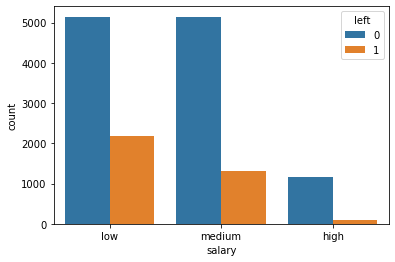

In [53]:
sns.countplot(x='salary', hue='left', data=df)

<AxesSubplot:xlabel='Department', ylabel='count'>

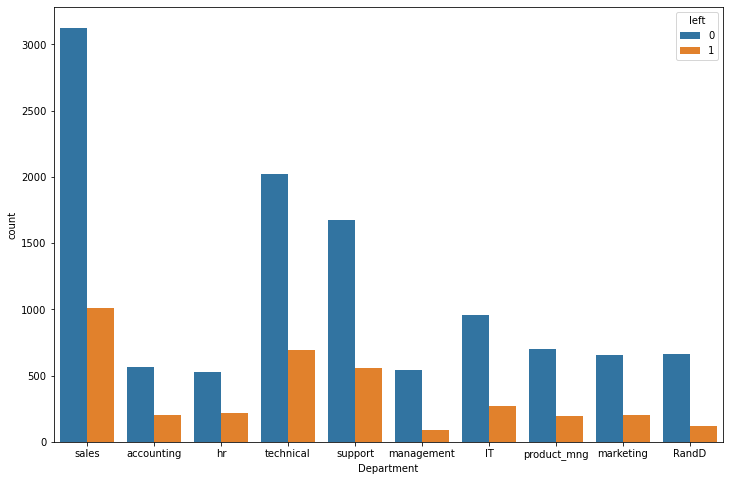

In [54]:
plt.figure(figsize=(12,8))
sns.countplot(x='Department', hue='left', data=df)

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis<br>

From the data analysis so far we can conclude that we will use following variables as independant variables in our model:<br>
**Satisfaction_Level**<br>
**Average_Monthly_Hours**<br>
**Promotion_Last_5_Years**<br>
**Salary**<br>
**time_spend_company**

#### Assigning important Features

In [55]:
new_df = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary', 'time_spend_company']]
new_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,time_spend_company
0,0.38,157,0,low,3
1,0.80,262,0,medium,6
2,0.11,272,0,medium,4
3,0.72,223,0,low,5
4,0.37,159,0,low,3
...,...,...,...,...,...
14994,0.40,151,0,low,3
14995,0.37,160,0,low,3
14996,0.37,143,0,low,3
14997,0.11,280,0,low,4


#### apply one hot encoder to salary column

In [56]:
dummies = pd.get_dummies(new_df.salary)
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


#### drop salary and one dummy column to avoid trapping in dummy variables trap

In [57]:
df_with_dummies = pd.concat([new_df,dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,time_spend_company,high,low,medium
0,0.38,157,0,low,3,0,1,0
1,0.80,262,0,medium,6,0,0,1
2,0.11,272,0,medium,4,0,0,1
3,0.72,223,0,low,5,0,1,0
4,0.37,159,0,low,3,0,1,0


In [58]:
df_with_dummies.drop(['salary', 'medium'],axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,time_spend_company,high,low
0,0.38,157,0,3,0,1
1,0.80,262,0,6,0,0
2,0.11,272,0,4,0,0
3,0.72,223,0,5,0,1
4,0.37,159,0,3,0,1


#### Assigning Features and target columns

In [59]:
X = df_with_dummies

X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,time_spend_company,high,low
0,0.38,157,0,3,0,1
1,0.80,262,0,6,0,0
2,0.11,272,0,4,0,0
3,0.72,223,0,5,0,1
4,0.37,159,0,3,0,1


In [60]:
X.shape

(14999, 6)

In [61]:
y =df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [62]:
y.shape

(14999,)

#### Split the model into training data and testing data

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7415)

#### Bulding and Training Logistic Regression model

In [103]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [104]:
model.score(X_test, y_test)

0.7738666666666667

#### Assign the parameters

In [127]:
theta_0 = model.intercept_
theta_1 = model.coef_[0][0]
theta_2 = model.coef_[0][1]
theta_3 = model.coef_[0][2]
theta_4 = model.coef_[0][3]
theta_5 = model.coef_[0][4]
theta_6 = model.coef_[0][5]

print(f"theta_0 = {theta_0}\ntheta_1 = {theta_1}\ntheta_2 = {theta_2}\ntheta_3 = {theta_3}\ntheta_4 = {theta_4}\ntheta_5 = {theta_5}\ntheta_6 = {theta_6}")

theta_0 = [-0.18622316]
theta_1 = -3.6978262684875784
theta_2 = 0.000909468533536883
theta_3 = -1.3763250777054616
theta_4 = 0.19393855145694508
theta_5 = -1.2822841655625568
theta_6 = 0.5289994483163678


#### define sigmoid function

In [128]:
from math import e,pow
def sigmoid_fun(x1,x2,x3,x4,x5,x6):
    return 1 / (1 + pow(e, -(theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3 + theta_4 * x4 + theta_5 * x5 + theta_6 * x6)))

#### testing the hypothesis function

In [129]:
sigmoid_fun(0.60, 138, 0, 6 , 0 , 1) # 35% probability to leave the company

0.3573736662986111

#### save the model

In [107]:
joblib.dump(model, 'Predict Likelihood of employees to leave the company')

['Predict Likelihood of employees to leave the company']

#### load the model

In [108]:
mj = joblib.load('Predict Likelihood of employees to leave the company')

#### Using the model after loading it

Predict the probability of the following:<br>

- satisfaction_level 0.45	average_montly_hours 164	promotion_last_5years 0	time_spend_company 8 salary medium
- satisfaction_level 0.65	average_montly_hours 180	promotion_last_5years 1	time_spend_company 6 salary medium
- satisfaction_level 0.40	average_montly_hours 190	promotion_last_5years 1	time_spend_company 10 salary high
- satisfaction_level 0.60	average_montly_hours 188	promotion_last_5years 0	time_spend_company 10 salary low

In [119]:
mj.predict_proba([[0.45, 164, 0, 8, 0, 0]]) # 53% probability to Stay and 46% to Leave

array([[0.53732636, 0.46267364]])

In [122]:
mj.predict_proba([[0.65, 180, 1, 6, 0, 0]]) # 93.3% stay and 6.6% to leave

array([[0.9333173, 0.0666827]])

In [123]:
mj.predict_proba([[0.40, 190, 1, 10, 1, 0]])  # 90% to stay and 10% to leave

array([[0.90130224, 0.09869776]])

In [124]:
mj.predict_proba([[0.60, 188, 0, 10, 0, 1]])  #44% to stay and 56% to leave

array([[0.44165547, 0.55834453]])